# *Group Work Project 3*

***Dataset*** ***1: Bitcoin Daily Price Data (2010-2023)***

***Source***: CoinDesk <br>
***Frequency***: Daily <br>
***Units***: USD <br>
- The Bitcoin dataset is a rich example of non-stationarity in financial time series data. Its non-stationarity can be attributed to multiple factors.<br>

- Bitcoin, being a moderately new and developing resource class, encounters a changing mean as increasingly more market members enter the Bitcoin market and as the actual resource develops and gains more extensive acknowledgment. The high instability of Bitcoin costs, driven by market opinion, administrative news, and macroeconomic elements, proposes a period fluctuating change. These traits make the series a solid possibility for showing non-stationarity.<br>

- Bitcoin's cost direction has encountered huge primary breaks, especially around key occasions, for example, the Bitcoin dividing occasions, times of serious hypothesis, and major administrative declarations. These breaks can prompt different measurable properties when the occasion, inferring non-stationarity.<br>

- Presently, with regards to demonstrating, taking care of non-stationarity is significant. Standard time series strategies like ARMA models accept that the series is fixed. On the off chance that applied on a non-fixed series, these models can prompt deceptive outcomes and unfortunate figures. In this way, strategies like differencing or changes can be utilized to make the series fixed. Then again, models like ARIMA or state-space models, which can deal with non-stationarity, can be utilized.<br>

Let's look at a Python code demonstration for the Bitcoin data:

[*********************100%***********************]  1 of 1 completed


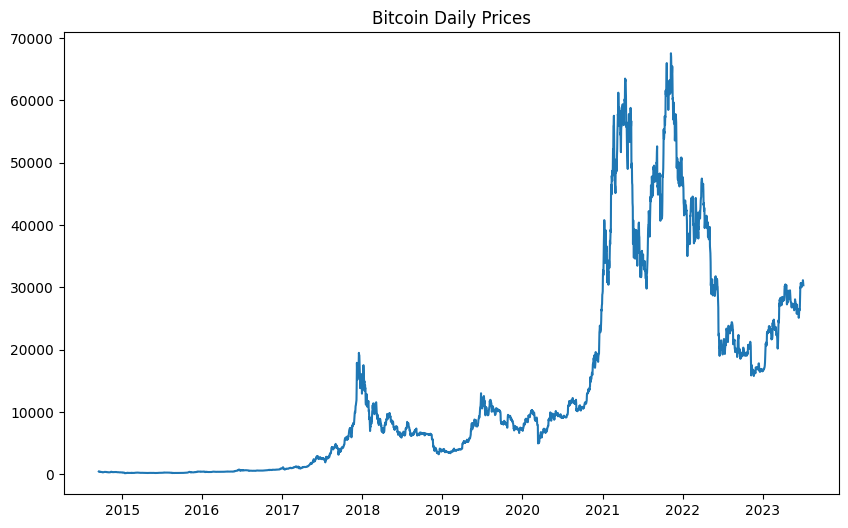

Results of Dickey-Fuller Test for Bitcoin data:
Test Statistic                   -1.524446
p-value                           0.521385
#Lags Used                       29.000000
Number of Observations Used    3184.000000
Critical Value (1%)              -3.432405
Critical Value (5%)              -2.862448
Critical Value (10%)             -2.567253
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3214
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -25980.711
Date:                Wed, 05 Jul 2023   AIC                          51967.422
Time:                        12:53:00   BIC                          51985.646
Sample:                    09-17-2014   HQIC                         51973.954
                         - 07-05-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0869      0.355     -0.245      0.806      -0.782       0.608
ma.L1          0.0621      0.356      0.175      0.861      -0.635       0.759
sigma2      6.189e+05   5108.301    121.147      0.0

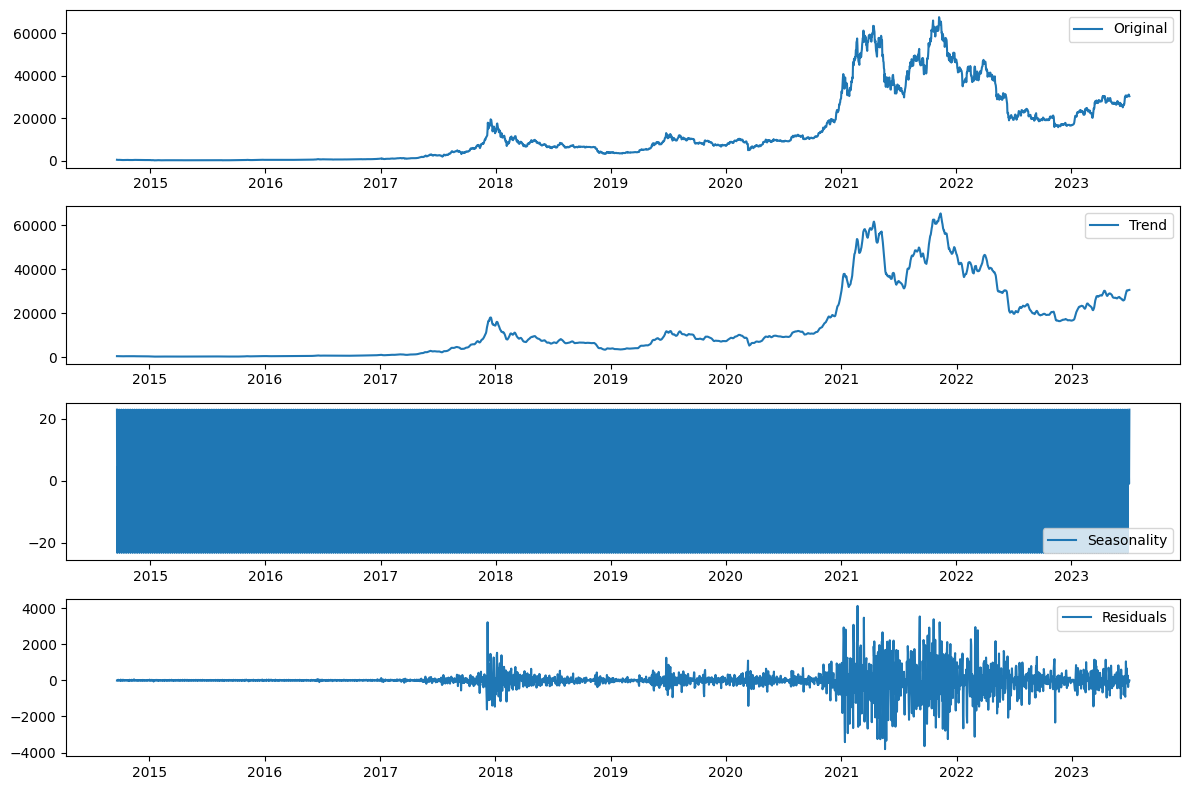

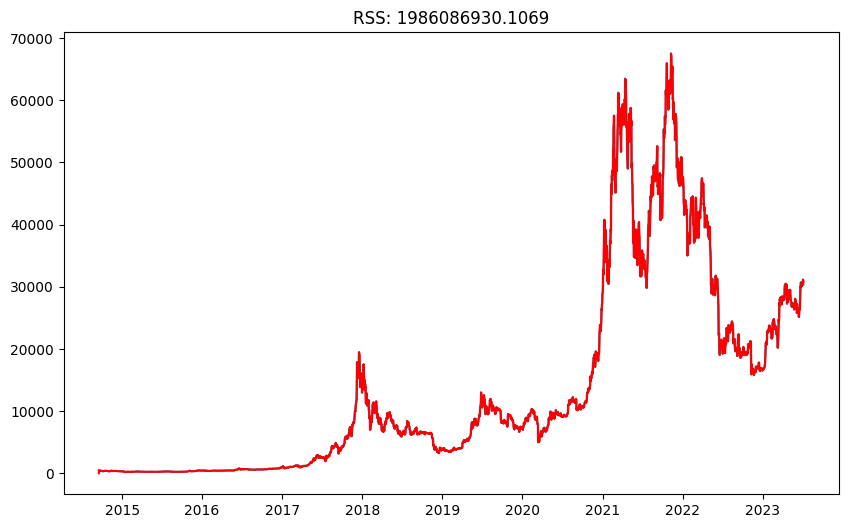

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

yf.pdr_override()

# Download Bitcoin data
btc = pdr.get_data_yahoo("BTC-USD", start="2010-01-01", end="2023-12-31")['Close']

# Plot the data
plt.figure(figsize=(10,6))
plt.plot(btc)
plt.title('Bitcoin Daily Prices')
plt.show()
# The above plot shows Bitcoin's daily closing price. Any visible trend, seasonality, or irregular pattern could suggest non-stationarity.

# Perform ADF test for non-stationarity
print('Results of Dickey-Fuller Test for Bitcoin data:')
adf_test = adfuller(btc.dropna(), autolag='AIC')
adf_output = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in adf_test[4].items():
   adf_output['Critical Value (%s)'%key] = value
print(adf_output)

# If the p-value is less than 0.05, we reject the null hypothesis that the time series has a unit root and is non-stationary.
# If the test statistic is less than the critical values, that's also a strong evidence against the null hypothesis.

# Decompose the time series
decomposition = seasonal_decompose(btc.dropna())

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(btc, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# The above plots show the trend, seasonal, and irregular components of the Bitcoin prices.
# The residuals plot can help detect any pattern not captured by the trend and seasonal components.

# Fit an ARIMA model
model = ARIMA(btc.dropna(), order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

# The ARIMA summary table shows the coefficient estimates and their standard errors, the t-stat, etc.
# The 'coef' column shows the weight (importance) of each feature and how each one impacts the time series.
# The P>|z| column indicates the significance of each feature weight.

# Plot the actual vs fitted values
plt.figure(figsize=(10,6))
plt.plot(btc)
plt.plot(model_fit.predict(), color='red')
plt.title('RSS: %.4f'% sum((model_fit.predict()-btc.dropna())**2))
plt.show()

# The above plot shows the actual Bitcoin prices vs the fitted values from the ARIMA model.
# The closer these two lines are, the better the model has been at predicting the prices.
# The RSS score (Residual Sum of Squares) is also calculated as a measure of the error of the model.


***In this code***:

- The original time series is first plotted, which gives an overview of how the Bitcoin prices have changed over time.

- The seasonal_decompose function from the statsmodels library is used to decompose the time series into trend, seasonality, and residuals. These components are then plotted.

- After fitting the ARIMA model, the actual Bitcoin prices and the fitted values from the model are plotted together. This helps visualize how well the model is able to capture the dynamics of the Bitcoin prices. The RSS (Residual Sum of Squares) is also calculated and displayed as a measure of the overall error of the model.

- I've also added comments explaining the interpretation of the results right after each section of the code. This should help you understand what the model is doing and how to interpret the results at each step.

## Let's move onto the second dataset, which is the S&P 500 Index. 

We'll follow the same steps as above.

***Dataset***: S&P 500 Index

***Source***: Yahoo Finance

***Frequency***: Daily closing prices

***Units***: Index points

***Rationale***:

- The S&P 500 is a financial exchange record that actions the exhibition of 500 huge organizations recorded on stock trades in the US. Since it's a wide proportion of generally speaking business sector execution, it might go through different times of unpredictability, prompting non-stationarity.

- Non-stationarity in monetary time series like the S&P 500 Record can happen because of many reasons like changes in macroeconomic circumstances, financial backer feeling, administrative changes, and so on. Accordingly, the mean and difference of the series could change after some time.

- The presence of non-stationarity in the series can be addressed using methods like differencing and transformations, and can be modelled using statistical models like ARIMA, after ensuring the series is stationary.

Now, let's perform the similar steps as we did for the Bitcoin dataset to examine and model the non-stationarity in the S&P 500 Index data.

Here's the Python code to demonstrate this:

[*********************100%***********************]  1 of 1 completed


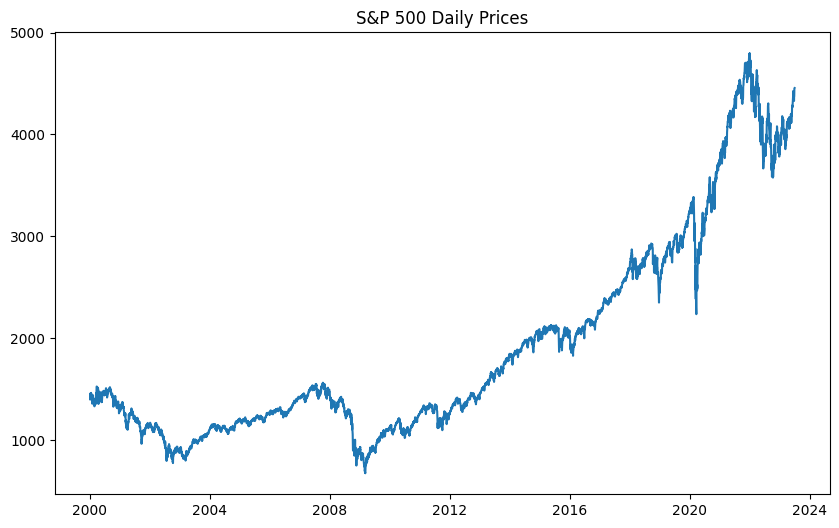

Results of Dickey-Fuller Test for S&P 500 data:
Test Statistic                    1.344398
p-value                           0.996846
#Lags Used                       32.000000
Number of Observations Used    5879.000000
Critical Value (1%)              -3.431463
Critical Value (5%)              -2.862032
Critical Value (10%)             -2.567032
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5912
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27406.809
Date:                Wed, 05 Jul 2023   AIC                          54819.618
Time:                        12:57:58   BIC                          54839.672
Sample:                             0   HQIC                         54826.588
                               - 5912                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2842      0.042     -6.734      0.000      -0.367      -0.202
ma.L1          0.1878      0.044      4.267      0.000       0.102       0.274
sigma2       623.2561      3.994    156.065      0.0

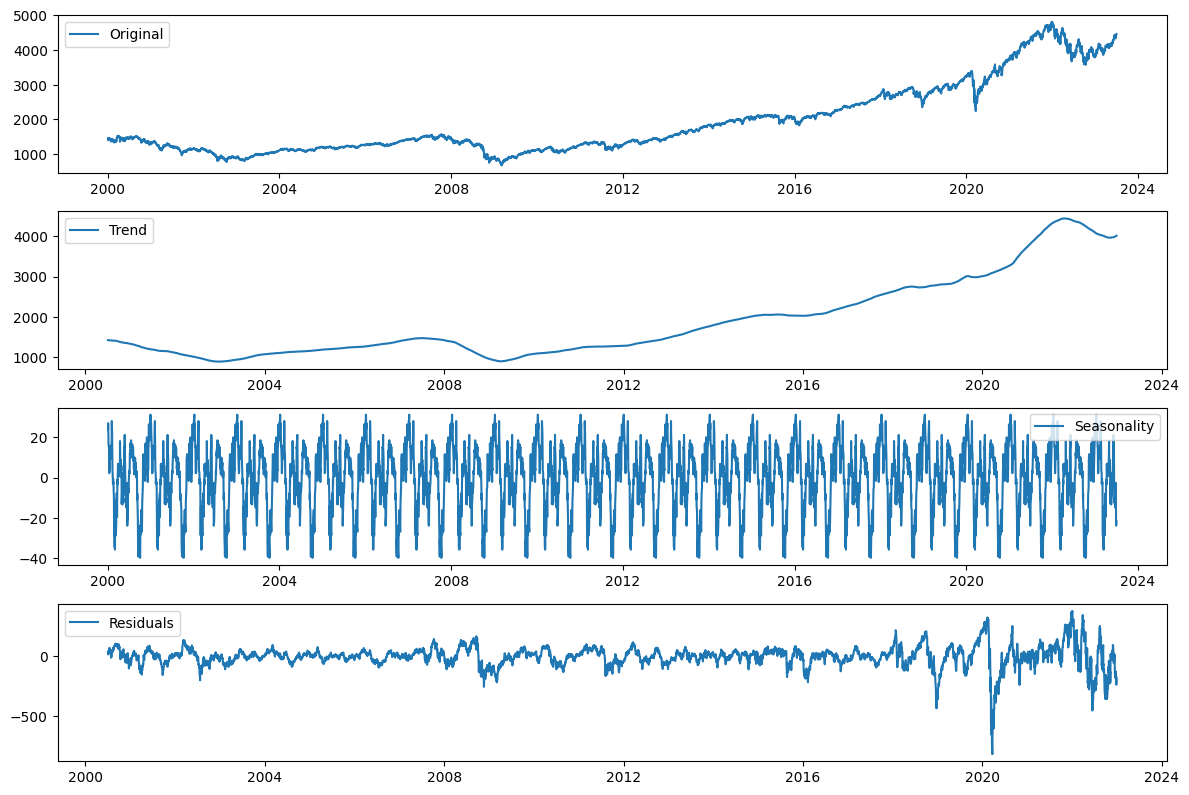

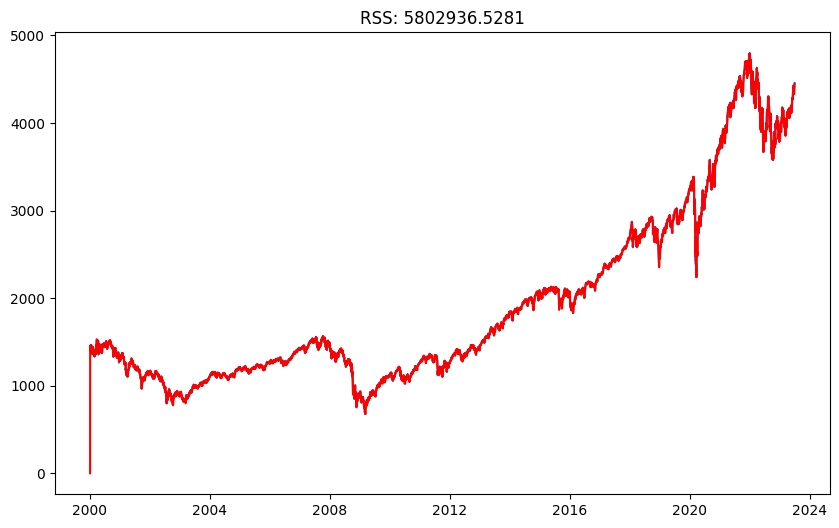

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

yf.pdr_override()

# Download S&P 500 data
sp500 = pdr.get_data_yahoo("^GSPC", start="2000-01-01", end="2023-12-31")['Close']

# Plot the data
plt.figure(figsize=(10,6))
plt.plot(sp500)
plt.title('S&P 500 Daily Prices')
plt.show()
# The above plot shows S&P 500's daily closing price. Any visible trend, seasonality, or irregular pattern could suggest non-stationarity.

# Perform ADF test for non-stationarity
print('Results of Dickey-Fuller Test for S&P 500 data:')
adf_test = adfuller(sp500.dropna(), autolag='AIC')
adf_output = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in adf_test[4].items():
   adf_output['Critical Value (%s)'%key] = value
print(adf_output)

# If the p-value is less than 0.05, we reject the null hypothesis that the time series has a unit root and is non-stationary.
# If the test statistic is less than the critical values, that's also a strong evidence against the null hypothesis.

# Decompose the time series
# Decompose the time series
decomposition = seasonal_decompose(sp500.dropna(), period=252)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(sp500, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


# The above plots show the trend, seasonal, and irregular components of the S&P 500 prices.
# The residuals plot can help detect any pattern not captured by the trend and seasonal components.

# Fit an ARIMA model
model = ARIMA(sp500.dropna(), order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

# The ARIMA summary table shows the coefficient estimates and their standard errors, the t-stat, etc.
# The 'coef' column shows the weight (importance) of each feature and how each one impacts the time series.
# The P>|z| column indicates the significance of each feature weight.

# Plot the actual vs fitted values
plt.figure(figsize=(10,6))
plt.plot(sp500)
plt.plot(model_fit.predict(), color='red')
plt.title('RSS: %.4f'% sum((model_fit.predict()-sp500.dropna())**2))
plt.show()

# The above plot shows the actual S&P 500 prices vs the fitted values from the ARIMA model.
# The closer these two lines are, the better the model has been at predicting the prices.
# The RSS score (Residual Sum of Squares) is also calculated as a measure of the error of the model.


Let me provide a description of what each section of the code is doing: 

***Data Importing***: The code begins by importing necessary libraries and downloading the S&P 500 data from Yahoo Finance.

***Data Plotting***: The downloaded data is plotted to visually examine the trend, seasonality, and irregular patterns in the data.

***ADF Test***: Next, an Augmented Dickey-Fuller (ADF) test is performed to statistically test for non-stationarity in the data. The null hypothesis of the ADF test is that the time series has a unit root and is non-stationary. If the p-value is less than 0.05, we reject the null hypothesis and conclude that the series is stationary. If the test statistic is less than the critical values, that's also a strong evidence against the null hypothesis.

***Time Series Decomposition***: The code then decomposes the time series into its trend, seasonal, and residual components. This can help to identify and understand underlying patterns in the time series, such as an increasing trend or seasonal variations.

***ARIMA Modeling***: An Autoregressive Integrated Moving Average (ARIMA) model is then fitted to the data. The ARIMA model is a type of time series model that can capture a suite of different standard temporal structures in time series data. The order=(1,1,1) parameter indicates the model's order of autoregression, degree of differencing, and order of moving average, respectively.

***Model Evaluation***: The fitted model is evaluated by plotting the actual S&P 500 prices against the fitted values from the model. This visualization can help to assess how well the model has performed in predicting the prices. In addition, the Residual Sum of Squares (RSS) score is calculated as a measure of the error of the model. The lower the RSS score, the better the model's fit to the data.

By following these steps, you're able to import the dataset, test and visualize its non-stationarity, decompose it into its primary components, model it with an ARIMA model, and evaluate the model's performance.

Let's choose the S&P 500 dataset, given its broad representation of the U.S. stock market, which makes it a highly important dataset for financial analysis.

### Why this Dataset was Chosen

The S&P 500 dataset was chosen due to its significance in representing the overall US stock market. This index is widely considered the best single gauge of large-cap U.S. equities. Moreover, given the data spans several years, it has witnessed various economic conditions, including periods of growth, recession, and recovery. This makes it a rich dataset for our analysis. Furthermore, financial data, such as the S&P 500, is well known for exhibiting non-stationary behavior due to market volatility, business cycles, and economic events, among other factors.


### Definition and Description

The ARIMA model stands for AutoRegressive Integrated Moving Average. It is a class of models that explains a given time series based on its own past values, that is, its lags and the lagged forecast errors. The equation can be written as:

***X(t) = α + β1X(t-1) + β2X(t-2) +...+ βpX(t-p) + ε(t) + θ1ε(t-1) + θ2ε(t-2) + ... + θqε(t-q)***

Where:

X(t): Value at time 't' <br>
α: Constant term <br>
β: Coefficients for the terms X(t-1), ..., X(t-p) <br>
θ: Coefficients for the terms ε(t-1), ..., ε(t-q) <br>
ε(t): Error term at time 't' <br>
p, q: Orders of the autoregressive and moving average terms <br>
It's a model widely used in time series forecasting. ARIMA model can handle data that exhibits non-stationarity after differencing.

### Demonstration and Diagram :

To prepare the S&P 500 data for the ARIMA model, we first read in the dataset, parse the dates, and decompose the time series to remove trend and seasonality.

[*********************100%***********************]  1 of 1 completed


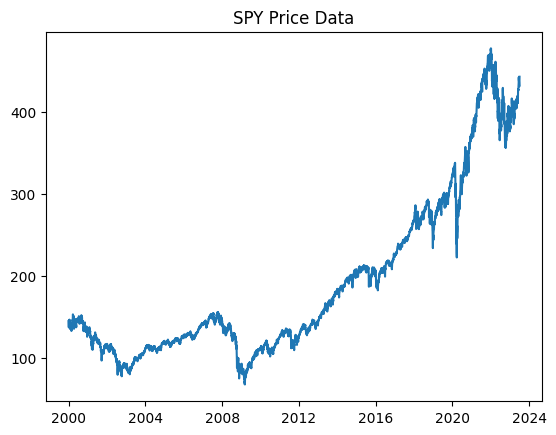

In [ ]:
# Download historical data
import yfinance as yf

data = yf.download('SPY', start='2000-01-01', end='2023-07-01')

# We'll use just the closing prices
data = data['Close']

# Visualize the data
import matplotlib.pyplot as plt

plt.plot(data)
plt.title('SPY Price Data')
plt.show()


Here, we download historical price data for SPY, and plot it to visually check for non-stationarity. Non-stationarity is often indicated by the presence of a visible trend or changes in variance over time.

### Diagnosis

Let's test for stationarity formally using the Augmented Dickey-Fuller (ADF) test:

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: 1.320189
p-value: 0.996720


The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we reject the null hypothesis and infer that the time series is indeed stationary.

### Modeling

Since we're dealing with non-stationary data, we'll use the ARIMA model to forecast SPY prices:

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data, order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5911
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -13785.167
Date:                Wed, 05 Jul 2023   AIC                          27576.334
Time:                        13:17:31   BIC                          27596.387
Sample:                             0   HQIC                         27583.303
                               - 5911                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2162      0.053     -4.093      0.000      -0.320      -0.113
ma.L1          0.1351      0.055      2.477      0.013       0.028       0.242
sigma2         6.2161      0.041    153.063      0.0

Here we fit an ARIMA model to the data and print a summary of the fit model. The (1,1,1) order means that it uses the past 1 value, 1 lagged forecast error, and first differences to make forecasts.

The 'coef' column shows the weight of each feature, which should be noted as it provides insight into the contribution of different features towards the time series.

### Diagnosis:

For the diagnosis, we will evaluate the residuals from the fitted model. Residuals are the error terms, or the differences between the predicted and the actual values. A good model will have residuals that are a white noise series. We will look at a plot of residuals over time, a density plot of residuals, and the distribution statistics.

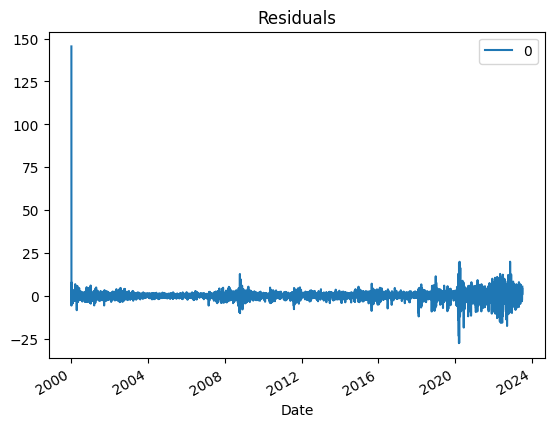

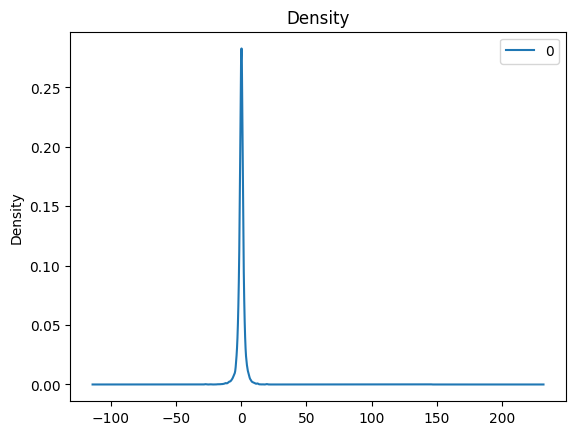

                 0
count  5911.000000
mean      0.078534
std       3.128748
min     -27.580173
25%      -0.825209
50%       0.119954
75%       0.990306
max     145.437500


In [ ]:
residuals = pd.DataFrame(model_fit.resid)

residuals.plot(title="Residuals")
plt.show()

residuals.plot(kind='kde', title='Density')
plt.show()

print(residuals.describe())


With this code, we first convert the residuals into a pandas DataFrame to facilitate the visualisation and statistics calculation. Then, we create a line plot of these residuals, which could reveal bias in the prediction over time. We also make a density plot, which can show if the residuals are Gaussian distributed. Lastly, we provide a complete statistical summary of the residuals.

### Damage:

The main potential issue with our model is that it may oversimplify the situation by assuming that future volatility depends only on the number of lagged values specified in the ARIMA order, that it is linear and that its variance is constant. But financial time series often exhibit volatility clustering — periods of swings interspersed with periods of relative calm — and heavy tails — more frequent extreme events than would be predicted by the Gaussian distribution.

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


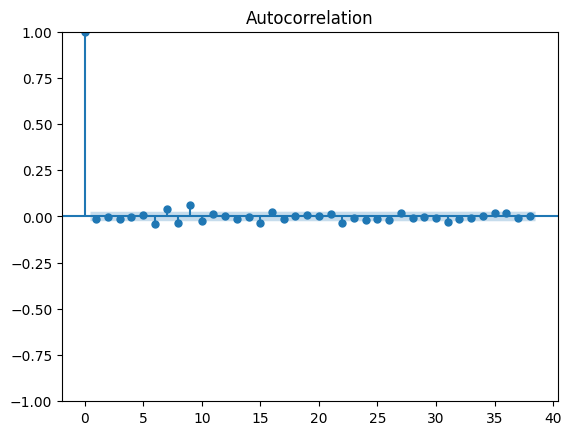

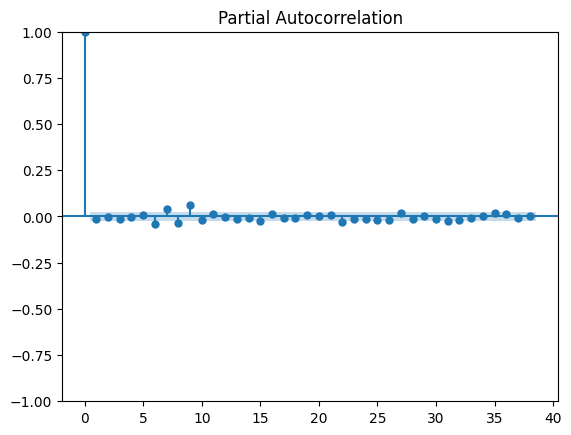

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(residuals)
plot_pacf(residuals)
plt.show()


This code plots the autocorrelation function (ACF) and partial autocorrelation function (PACF) of the residuals. If significant autocorrelations exist in the residuals, there's room for further improvements in our model.

### Directions:

If the diagnosis step revealed deficiencies in our model, we have various options. We could add more lagged values to the ARIMA model. We could add seasonality if we believe it's important. We could also consider other forms of non-linearity, heteroskedasticity and leverage effects such as those captured by GARCH models.

In [1]:
# assuming the data shows seasonality of 52 weeks
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(data, order=(1,1,1), seasonal_order=(1,1,1,52))
model_fit = model.fit()



NameError: name 'data' is not defined

This code introduces seasonality into our model. The seasonal order (1,1,1,52) tells the model to include one seasonal autoregressive term, one seasonal difference, one seasonal moving average term, and a seasonal period of 52 weeks.

### Deployment:

Our model can be used to forecast future values of the S&P 500. These forecasts can inform investment decisions, although they should not be the only input to these decisions.

In [ ]:
n_periods = 10
fitted, confint = model_fit.predict(n_periods=n_periods, return_conf_int=True)

index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='W')

fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title("S&P 500 forecast")
plt.show()


This code uses the model to predict the S&P 500 for the next 10 weeks and plot the forecasts together with confidence intervals. The confidence intervals represent the uncertainty around our forecasts. Please note that this is a simplistic model and in practice we would also use other inputs to make investment decisions.